In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/data/robert_frost.txt') as story:
  story_data = story.read()

In [ ]:
print(story_data)


Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I—
I took the one less traveled by,
And that has made all the difference.

Whose woods these are I think I know.   
His house is in the village though;   
He will not see me stopping here   
To watch his woods fill up with snow.   

My little horse must think it queer   
To stop without a farmhouse near   
Between the woods and frozen lake   

In [ ]:
import re                                # Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [ ]:
# cleaning the data
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

print(split_data)

final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final)

['two roads diverged in a yellow wood,', 'and sorry i could not travel both', 'and be one traveler, long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth;', '', 'then took the other, as just as fair,', 'and having perhaps the better claim,', 'because it was grassy and wanted wear;', 'though as for that the passing there', 'had worn them really about the same,', '', 'and both that morning equally lay', 'in leaves no step had trodden black.', 'oh, i kept the first for another day!', 'yet knowing how way leads on to way,', 'i doubted if i should ever come back.', '', 'i shall be telling this with a sigh', 'somewhere ages and ages hence:', 'two roads diverged in a wood, and i—', 'i took the one less traveled by,', 'and that has made all the difference.', '', 'whose woods these are i think i know.   ', 'his house is in the village though;   ', 'he will not see me stopping here   ', 'to watch his woods fill up with snow.   ', '', 'my little horse must t

In [ ]:
final_data = final.split('\n')
 # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)


['', 'two roads diverged in a yellow wood', 'and sorry i could not travel both', 'and be one traveler long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth', '', 'then took the other as just as fair', 'and having perhaps the better claim', 'because it was grassy and wanted wear', 'though as for that the passing there', 'had worn them really about the same', '', 'and both that morning equally lay', 'in leaves no step had trodden black', 'oh i kept the first for another day!', 'yet knowing how way leads on to way', 'i doubted if i should ever come back', '', 'i shall be telling this with a sigh', 'somewhere ages and ages hence', 'two roads diverged in a wood and i—', 'i took the one less traveled by', 'and that has made all the difference', '', 'whose woods these are i think i know   ', 'his house is in the village though   ', 'he will not see me stopping here   ', 'to watch his woods fill up with snow   ', '', 'my little horse must think it queer  

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#These are used for text tokenization and padding sequences to ensure they have the same length, respectively.

In [ ]:
# Instantiating the Tokenizer
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab) #instance of the tokenizer
tokenizer.fit_on_texts(final_data) #updates the internal vocabulary based on the text data provided

In [ ]:
# Getting the total number of words of the data.
word2idx = tokenizer.word_index #retrieves the dictionary mapping words to their indices.
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1
# Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

544
{'the': 1, 'to': 2, 'and': 3, 'i': 4, 'a': 5, 'of': 6, 'in': 7, 'he': 8, 'it': 9, 'was': 10, 'them': 11, 'not': 12, 'one': 13, 'as': 14, 'could': 15, 'for': 16, 'be': 17, 'that': 18, 'with': 19, 'by': 20, 'but': 21, 'trees': 22, 'so': 23, 'had': 24, 'you': 25, 'they': 26, 'there': 27, 'on': 28, 'all': 29, 'his': 30, 'some': 31, 'have': 32, 'like': 33, 'too': 34, 'down': 35, 'where': 36, 'then': 37, 'come': 38, 'me': 39, 'go': 40, 'their': 41, 'over': 42, 'would': 43, 'christmas': 44, 'if': 45, 'woods': 46, 'are': 47, 'wind': 48, 'away': 49, 'out': 50, 'from': 51, 'what': 52, 'its': 53, 'took': 54, 'no': 55, 'yet': 56, 'should': 57, 'back': 58, 'think': 59, 'know': 60, 'is': 61, 'see': 62, 'my': 63, 'before': 64, 'when': 65, 'left': 66, 'right': 67, 'do': 68, 'going': 69, 'or': 70, 'id': 71, 'place': 72, 'enough': 73, 'thousand': 74, 'wood': 75, 'both': 76, 'long': 77, 'other': 78, 'having': 79, 'though': 80, 'about': 81, 'way': 82, 'up': 83, 'little': 84, 'must': 85, 'birches': 86,

In [ ]:
input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  #converts the line into a sequence of integers.
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

In [ ]:
print(input_seq)

[[112, 113], [112, 113, 114], [112, 113, 114, 7], [112, 113, 114, 7, 5], [112, 113, 114, 7, 5, 190], [112, 113, 114, 7, 5, 190, 75], [3, 191], [3, 191, 4], [3, 191, 4, 15], [3, 191, 4, 15, 12], [3, 191, 4, 15, 12, 192], [3, 191, 4, 15, 12, 192, 76], [3, 17], [3, 17, 13], [3, 17, 13, 193], [3, 17, 13, 193, 77], [3, 17, 13, 193, 77, 4], [3, 17, 13, 193, 77, 4, 194], [3, 115], [3, 115, 35], [3, 115, 35, 13], [3, 115, 35, 13, 14], [3, 115, 35, 13, 14, 116], [3, 115, 35, 13, 14, 116, 14], [3, 115, 35, 13, 14, 116, 14, 4], [3, 115, 35, 13, 14, 116, 14, 4, 15], [2, 36], [2, 36, 9], [2, 36, 9, 195], [2, 36, 9, 195, 7], [2, 36, 9, 195, 7, 1], [2, 36, 9, 195, 7, 1, 196], [37, 54], [37, 54, 1], [37, 54, 1, 78], [37, 54, 1, 78, 14], [37, 54, 1, 78, 14, 197], [37, 54, 1, 78, 14, 197, 14], [37, 54, 1, 78, 14, 197, 14, 198], [3, 79], [3, 79, 199], [3, 79, 199, 1], [3, 79, 199, 1, 117], [3, 79, 199, 1, 117, 200], [201, 9], [201, 9, 10], [201, 9, 10, 202], [201, 9, 10, 202, 3], [201, 9, 10, 202, 3, 203

In [ ]:
#prints this maximum sequence length, which is needed for padding.
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

11


In [ ]:
# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

[[  0   0   0 ...   0 112 113]
 [  0   0   0 ... 112 113 114]
 [  0   0   0 ... 113 114   7]
 ...
 [  0   0   0 ...  25 543   5]
 [  0   0   0 ... 543   5 544]
 [  0   0   0 ...   5 544  44]]


In [ ]:
# Taking xs and labels to train the model.

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[  0   0   0 ...   0   0 112]
 [  0   0   0 ...   0 112 113]
 [  0   0   0 ... 112 113 114]
 ...
 [  0   0   0 ... 189  25 543]
 [  0   0   0 ...  25 543   5]
 [  0   0   0 ... 543   5 544]]
labels: [113 114   7 ...   5 544  44]


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have
# a single +ve value(i.e 1) for that label and other values will be zero.

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# """Input: This is a Keras tensor object that is used to define the shape and data type of the inputs to your model.
# Dense: This is a fully connected neural network layer. It represents a linear operation in which every input is connected to every output by a weight.
# Embedding: This layer is used to create word embeddings, which are dense vector representations of words in a high-dimensional space. It is commonly used in natural language processing tasks to capture semantic relationships between words.
# LSTM: This is a Long Short-Term Memory layer, which is a type of recurrent neural network (RNN) layer. It is capable of learning long-term dependencies in sequence data.
# Dropout: This layer applies dropout regularization to the input. Dropout is a technique used to prevent overfitting by randomly setting a fraction of input units to zero during training.
# Bidirectional: This wrapper allows the LSTM layer to process input sequences in both forward and backward directions. It helps the model to capture dependencies in both past and future contexts.
# GlobalMaxPooling1D: This layer performs max pooling operation across the entire sequence dimension. It reduces the sequence dimensionality while retaining the most important information.
# Model: This class allows you to instantiate a Keras model by specifying its input and output layers.
# Adam: This is an optimization algorithm, specifically Adam, which is widely used for training neural networks. It adapts the learning rate during training.
# Sequential: This is a Keras model type that allows you to build models layer by layer sequentially."""

'Input: This is a Keras tensor object that is used to define the shape and data type of the inputs to your model.\nDense: This is a fully connected neural network layer. It represents a linear operation in which every input is connected to every output by a weight.\nEmbedding: This layer is used to create word embeddings, which are dense vector representations of words in a high-dimensional space. It is commonly used in natural language processing tasks to capture semantic relationships between words.\nLSTM: This is a Long Short-Term Memory layer, which is a type of recurrent neural network (RNN) layer. It is capable of learning long-term dependencies in sequence data.\nDropout: This layer applies dropout regularization to the input. Dropout is a technique used to prevent overfitting by randomly setting a fraction of input units to zero during training.\nBidirectional: This wrapper allows the LSTM layer to process input sequences in both forward and backward directions. It helps the mo

In [ ]:
# using the functional APIs of keras to define the model

i = Input(shape=(max_seq_length - 1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

# using the pipeline method of sequential to define a model

# model = Sequential()
# model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
# model.add(Dropout(0.2))
# model.add(LSTM(520, return_sequences=True))
# model.add(Bidirectional(LSTM(340, return_sequences=True)))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()

In [ ]:
r = model.fit(xs,ys,epochs=100)

Epoch 1/100
38/38 [==============================] - 25s 440ms/step - loss: 6.1536 - accuracy: 0.0467
Epoch 2/100
38/38 [==============================] - 15s 393ms/step - loss: 5.8212 - accuracy: 0.0384
Epoch 3/100
38/38 [==============================] - 15s 389ms/step - loss: 5.7448 - accuracy: 0.0409
Epoch 4/100
38/38 [==============================] - 15s 400ms/step - loss: 5.7258 - accuracy: 0.0459
Epoch 5/100
38/38 [==============================] - 15s 390ms/step - loss: 5.7130 - accuracy: 0.0467
Epoch 6/100
38/38 [==============================] - 16s 413ms/step - loss: 5.6878 - accuracy: 0.0476
Epoch 7/100
38/38 [==============================] - 15s 384ms/step - loss: 5.5948 - accuracy: 0.0417
Epoch 8/100
38/38 [==============================] - 15s 391ms/step - loss: 5.4141 - accuracy: 0.0518
Epoch 9/100
38/38 [==============================] - 15s 388ms/step - loss: 5.2631 - accuracy: 0.0534
Epoch 10/100
38/38 [==============================] - 15s 396ms/step - loss: 5.139

KeyboardInterrupt: 

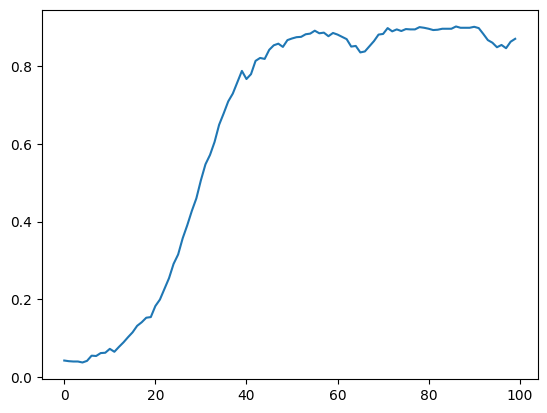

In [ ]:
# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [ ]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

In [ ]:
seed_text = 'i am feeling good today'
next_words = 50

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 49ms/step
i am feeling good today where its likely to go better brim clumps had poise had fallen apiece had fallen all meant to be— had strip three cents all them more apiece apiece apiece know me know i stay come back them them over over again them over again if i was tempted for a


In [ ]:
# saving the model

model.save('poem_generator.h5') # Will create a HDF5 file of the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
